In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r'C:\Users\JeevapurS\Hackathon\MAchineHack\Hackathon_sentiment_analysis\Dataset\Dataset\Train.csv')
df.head()

,Text_ID,Data,Response
0,1649,Lunch was surreal .,0
1,4705,It offers certificates of completion for many ...,0
2,3320,No amount of educational funds will drag the p...,0
3,6182,"No, lets stay scattered across the earth and t...",0
4,7594,The two teenagers are charged with assaulting ...,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text_ID   7492 non-null   int64 
 1   Data      7492 non-null   object
 2   Response  7492 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.7+ KB


In [4]:
df['Response'].value_counts()

Response
0    6642
1     850
Name: count, dtype: int64

In [16]:
print("The total number of reviews is", df.shape[0])

The total number of reviews is 7492


In [128]:
#view one of the text randomly 
random = np.random.randint(0,len(df))
print(random)
print(df.iloc[random]['Data'], df.iloc[random]['Response'])

7471
I am 100 % Irish , All of my ancestors were white irish and there has only been one mix in my extended family and that was a white English person . 0


In [17]:
# created a length of Data column to use as a feature
df['Data'] = df['Data'].apply(str)
df['text_length'] = df['Data'].apply(len)

In [20]:
df.head()

,Text_ID,Data,Response,text_length
0,1649,Lunch was surreal .,0,19
1,4705,It offers certificates of completion for many ...,0,55
2,3320,No amount of educational funds will drag the p...,0,77
3,6182,"No, lets stay scattered across the earth and t...",0,108
4,7594,The two teenagers are charged with assaulting ...,0,95


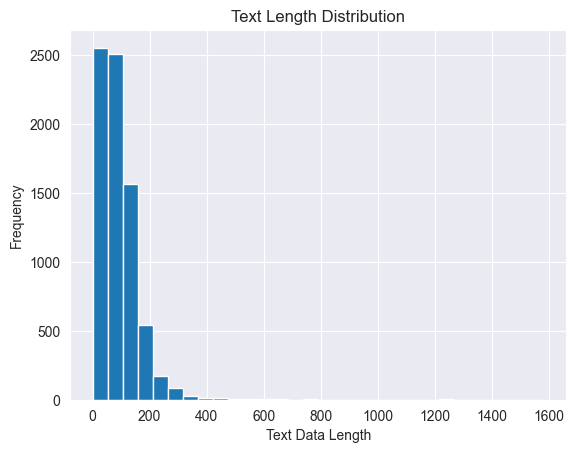

In [19]:
sns.set_style('darkgrid')
plt.hist(df.text_length,bins=30)
plt.xlabel('Text Data Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

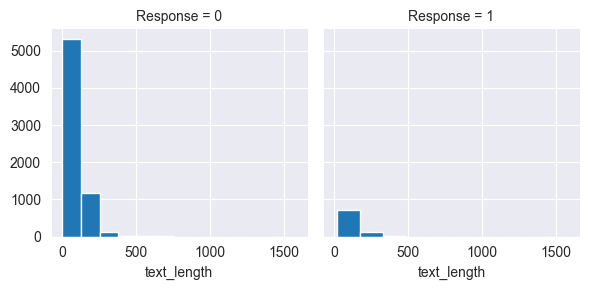

In [21]:
p = sns.FacetGrid(df, col='Response')
p.map(plt.hist, 'text_length')

In [34]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JeevapurS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# remove punctuation and stopwords
def clean_text(text):
    rem_punc = ''.join([char for char in text if char not in string.punctuation])
    rem_stop = [word for word in rem_punc.split() if word.lower() not in stopwords.words('english')]
    return rem_stop

# Model Training with Count Vectorization

In [36]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer=clean_text)
text_vec = count_vec.fit_transform(df.Data)

In [37]:
text_vec.shape

(7492, 15345)

In [39]:
# Intialize X and y values for the model
X = text_vec
y = df.Response.values

In [41]:

print(X.shape)
print(y.shape)
     

(7492, 15345)
(7492,)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

### Naive Base

[[933  63]
 [ 97  31]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       996
           1       0.33      0.24      0.28       128

    accuracy                           0.86      1124
   macro avg       0.62      0.59      0.60      1124
weighted avg       0.84      0.86      0.85      1124

Score: 85.77


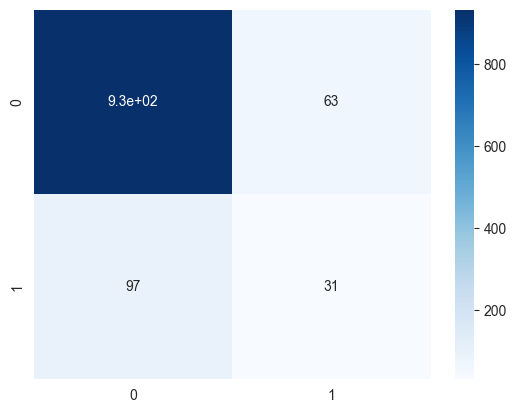

In [43]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)


# model evalualtion
y_pred = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
print(cm)
print(classification_report(y_test, y_pred))
print("Score:",round(accuracy_score(y_test,y_pred)*100,2))